# **بِسْمِ ٱللَّٰهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ**

In [ ]:
print("Bismillah")

Bismillah


In [ ]:
# %reset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.23 ms (started: 2021-01-05 17:58:57 +00:00)


# **Imports**

In [ ]:
!pip install ipython-autotime

In [ ]:
# necessary imports
import os
import cv2
import numpy as np
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

from google.colab.patches import cv2_imshow

%load_ext autotime

time: 141 µs (started: 2021-01-05 17:58:54 +00:00)


# Initializing

In [ ]:
img_width = 90
img_height = 90

time: 831 µs (started: 2021-01-05 17:58:54 +00:00)


# **VGG Model**

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

time: 1.44 s (started: 2021-01-05 17:58:54 +00:00)


In [ ]:
# load VGG16 model without classification layers
model = VGG16(include_top=False, input_shape=(img_width, img_height, 3))

time: 1.14 s (started: 2021-01-05 17:58:56 +00:00)


In [ ]:
# add new classification layers
flat1 = Flatten()(model.layers[-1].output) # flatten last layer
class1 = Dense(1024, activation='relu')(flat1) # add FC layer on previous layer
output = Dense(6, activation='softmax')(class1) # add softmax layer

time: 21.8 ms (started: 2021-01-05 17:58:57 +00:00)


In [ ]:
# define the new model
model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 90, 90, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 90, 90, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 90, 90, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 45, 45, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 45, 45, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 45, 45, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 22, 22, 128)       0     

# **Loading Data**

Load data function

In [ ]:
# A function to load data from a given directory
def load_data(data_dir):
  data = []
  labels = []
  class_dirs = os.listdir(data_dir)
  
  for direc in class_dirs:
    class_dir = os.path.join(data_dir, direc)
    for imagepath in tqdm(list(paths.list_images(class_dir))):
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (img_width, img_height))  # incase images not of same size
      data.append(image)
      labels.append(direc)
  # normalizing and converting to numpy array format
  data = np.array(data, dtype='float')/255.0
  labels = np.array(labels)
  return data, labels

time: 14.8 ms (started: 2021-01-05 17:58:57 +00:00)


Data Paths

In [ ]:
train_dir = "/content/drive/MyDrive/CV/Assignment 3/seg_train/seg_train/"
test_dir = "/content/drive/MyDrive/CV/Assignment 3/seg_test/seg_test/"
pred_dir = "/content/drive/MyDrive/CV/Assignment 3/pred/seg_pred/seg_pred/"

time: 1.58 ms (started: 2021-01-05 17:58:57 +00:00)


Loading Training Images

In [ ]:
print('loading train images')
X_train, y_train = load_data(train_dir)

  0%|          | 0/2191 [00:00<?, ?it/s]

loading train images


100%|██████████| 2382/2382 [00:06<00:00, 346.15it/s]


time: 43.4 s (started: 2021-01-05 17:58:57 +00:00)


Loading Validation images

In [ ]:
X_valid, y_valid = load_data(test_dir)

100%|██████████| 501/501 [00:01<00:00, 350.86it/s]


time: 8.95 s (started: 2021-01-05 17:59:40 +00:00)


In [ ]:
X_train = np.append(X_train, X_valid, axis=0)
y_train = np.append(y_train, y_valid, axis=0)

time: 1.24 s (started: 2021-01-05 17:59:49 +00:00)


In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)

time: 16.4 ms (started: 2021-01-05 17:59:51 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_valid, y_train, y_valid) = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

time: 784 ms (started: 2021-01-05 17:59:51 +00:00)


# Compile the model

In [ ]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

time: 22.3 ms (started: 2021-01-05 17:59:51 +00:00)


# Train the model

In [ ]:
H = model.fit(X_train, y_train, batch_size=128,
              epochs=10, 
              validation_data=(X_valid, y_valid))

Epoch 1/10
107/107 [==============================] - 47s 345ms/step - loss: 0.9978 - accuracy: 0.6052 - val_loss: 0.3101 - val_accuracy: 0.8911
Epoch 2/10
107/107 [==============================] - 35s 327ms/step - loss: 0.2988 - accuracy: 0.8992 - val_loss: 0.3382 - val_accuracy: 0.8735
Epoch 3/10
107/107 [==============================] - 34s 322ms/step - loss: 0.2360 - accuracy: 0.9192 - val_loss: 0.2649 - val_accuracy: 0.9043
Epoch 4/10
107/107 [==============================] - 35s 326ms/step - loss: 0.1882 - accuracy: 0.9349 - val_loss: 0.2879 - val_accuracy: 0.9026
Epoch 5/10
107/107 [==============================] - 35s 325ms/step - loss: 0.1628 - accuracy: 0.9428 - val_loss: 0.2537 - val_accuracy: 0.9131
Epoch 6/10
107/107 [==============================] - 35s 325ms/step - loss: 0.1260 - accuracy: 0.9566 - val_loss: 0.2649 - val_accuracy: 0.9131
Epoch 7/10
107/107 [==============================] - 35s 325ms/step - loss: 0.1011 - accuracy: 0.9649 - val_loss: 0.2712 - val_ac

Some Graphs

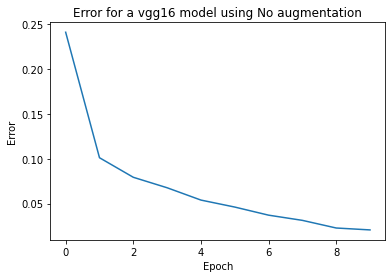

time: 176 ms (started: 2021-01-05 18:53:11 +00:00)


In [ ]:
simple_acc = H.history['accuracy']
plt.plot([1 - acc for acc in simple_acc])
plt.title('Error for a vgg16 model using No augmentation')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.savefig('/content/drive/MyDrive/CV/Assignment 3/vgg16/simple_acc_error.png')
plt.show()

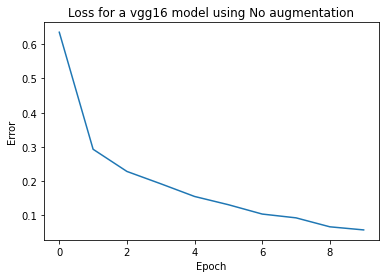

time: 177 ms (started: 2021-01-05 18:53:34 +00:00)


In [ ]:
simple_loss = H.history['loss']
plt.plot([los for los in simple_loss])
plt.title('Loss for a vgg16 model using No augmentation')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.savefig('/content/drive/MyDrive/CV/Assignment 3/vgg16/simple_loss_error.png')
plt.show()

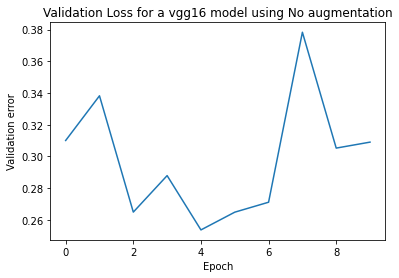

time: 181 ms (started: 2021-01-05 18:55:28 +00:00)


In [ ]:
simple_val_loss = H.history['val_loss']
plt.plot([los for los in simple_val_loss])
plt.title('Validation Loss for a vgg16 model using No augmentation')
plt.ylabel('Validation error')
plt.xlabel('Epoch')
plt.savefig('/content/drive/MyDrive/CV/Assignment 3/vgg16/simple_Validation_loss_error.png')
plt.show()

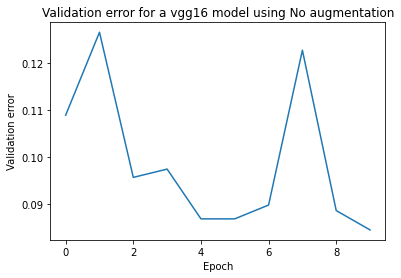

time: 313 ms (started: 2021-01-05 18:55:31 +00:00)


In [ ]:
simple_val_acc = H.history['val_accuracy']
plt.plot([1 - acc for acc in simple_val_acc])
plt.title('Validation error for a vgg16 model using No augmentation')
plt.ylabel('Validation error')
plt.xlabel('Epoch')
plt.savefig('/content/drive/MyDrive/CV/Assignment 3/vgg16/simple_Validation_error.png')
plt.show()

Saving Model weights

In [ ]:
# save the model's trained weights
model.save_weights('/content/drive/MyDrive/CV/Assignment 3/vgg_transfer_trained_wts.h5')

time: 1.75 s (started: 2021-01-05 18:05:51 +00:00)


In [ ]:
# model.load_weights('/content/drive/MyDrive/CV/Assignment 3/vgg_transfer_trained_wts.h5')

# Testing

Loading Testing Data

In [ ]:
print('loading test images')
X_test, y_test = load_data(pred_dir)
y_test = lb.fit_transform(y_test)

loading test images


100%|██████████| 1144/1144 [03:16<00:00,  5.83it/s]


time: 21min 11s (started: 2021-01-05 18:05:53 +00:00)


Testing Model

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=64)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

115/115 [==============================] - 6s 50ms/step - loss: 0.4411 - accuracy: 0.8914
Test Loss =  0.44113513827323914
Test Accuracy =  0.8913847208023071
time: 7.51 s (started: 2021-01-05 18:27:05 +00:00)


Confusion Matrix

In [ ]:
'''CONFUSION MATRIX'''
# Making prediction
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=-1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

time: 7.74 s (started: 2021-01-05 18:27:12 +00:00)


In [ ]:
confusion_mtx

array([[1048,    6,    1,    1,   13,   75],
       [   4, 1152,    1,    3,    2,    4],
       [   4,    5,  966,  267,   87,    1],
       [   6,    7,   40, 1147,   94,    3],
       [   5,    5,   14,   40, 1057,    7],
       [  75,   11,    0,    3,    9, 1138]])

time: 4.19 ms (started: 2021-01-05 18:27:20 +00:00)


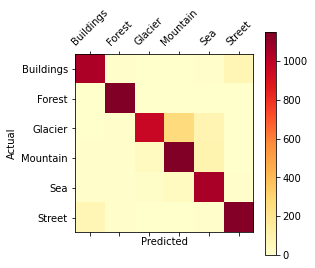

time: 170 ms (started: 2021-01-05 19:13:33 +00:00)


In [ ]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.YlOrRd):
  plt.matshow(df_confusion, cmap=cmap) # imshow
  plt.colorbar()
  tick_marks = np.arange(6)
  names = ["Buildings", "Forest", "Glacier", "Mountain", "Sea", "Street"]
  plt.xticks(tick_marks, names, rotation=45)
  plt.yticks(tick_marks, names)
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
#call function
plot_confusion_matrix(confusion_mtx)

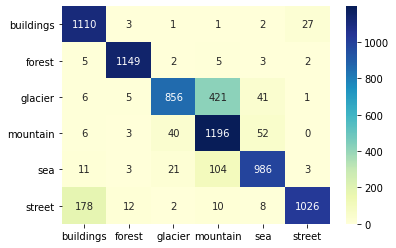

time: 349 ms (started: 2021-01-08 13:51:18 +00:00)


In [ ]:
import seaborn as sns

class_names = ['buildings','street','forest','glacier','mountain','sea']

class_names = sorted(class_names)

sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names,

            annot=True, fmt='d', cmap="YlGnBu")

Visualizing some data

In [ ]:
def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 6):
        plt.subplot(3, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()

time: 3.75 ms (started: 2021-01-08 16:39:01 +00:00)


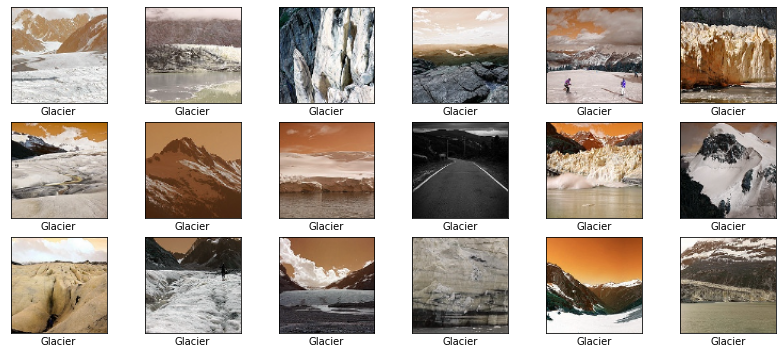

time: 879 ms (started: 2021-01-08 16:39:02 +00:00)


In [ ]:
names = ["Buildings", "Forest", "Glacier", "Mountain", "Sea", "Street"]
visualize_data(X_test, y_test, names)

Loss/Error Graphs

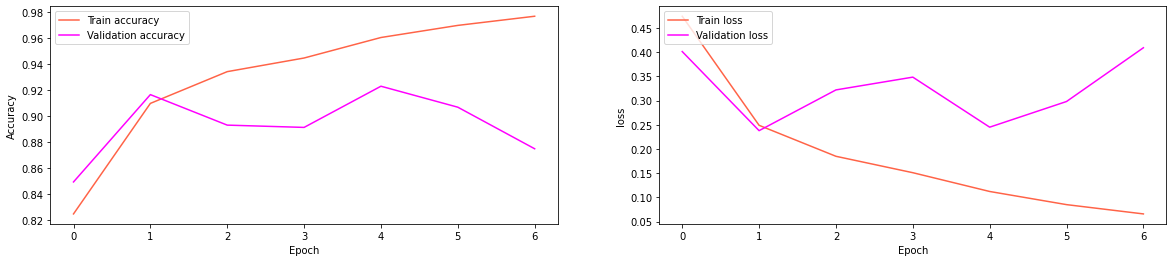

time: 473 ms (started: 2021-01-08 13:18:12 +00:00)


In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(20, 4))


axis[0].plot(H.history['accuracy'],
         label='Train accuracy',
         c='tomato', ls='-')
axis[0].plot(H.history['val_accuracy'],
         label='Validation accuracy',
         c='magenta', ls='-')

axis[0].set_xlabel('Epoch')
axis[0].set_ylabel('Accuracy')
axis[0].legend(loc='upper left')


axis[1].plot(H.history['loss'],
         label='Train loss',
         c='tomato', ls='-')
axis[1].plot(H.history['val_loss'],
         label='Validation loss',
         c='magenta', ls='-')

axis[1].set_xlabel('Epoch')
axis[1].set_ylabel('loss')
axis[1].legend(loc='upper left')
plt.savefig(save_path+'/simple_Validation_error&loss.png')
plt.show()

Google Colab Link: https://colab.research.google.com/drive/1VxFnPZbg0gKJU8KXDUHK5Cy3Gg4asQrv?usp=sharing